In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [78]:
#Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [79]:
#As there is only few colum so we have dropped that row
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [80]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [81]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


In [82]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [83]:
df['Geography'].value_counts()

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

In [84]:
df['Gender'].value_counts()

Gender
Male      5455
Female    4543
Name: count, dtype: int64

In [85]:
#df = pd.get_dummies(df, columns = ['Gender'], prefix = 'Gender' ,dtype=float)

In [86]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [87]:
from sklearn.preprocessing import LabelEncoder

le_geo = LabelEncoder()
le_gen = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])
df['Gender'] = le_gen.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


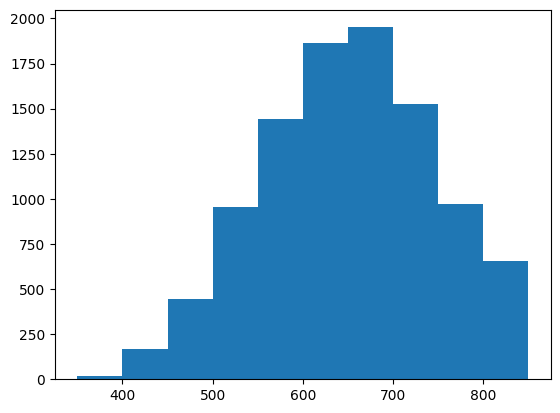

In [88]:
plt.hist(df['CreditScore'])
plt.show()

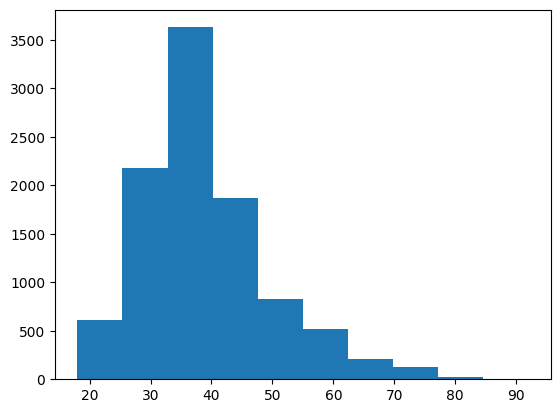

In [89]:
plt.hist(df['Age'])
plt.show()

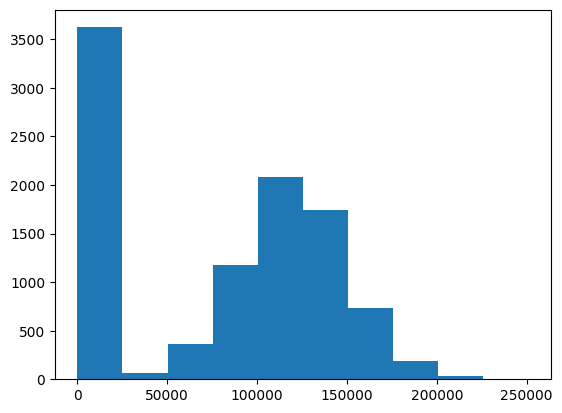

In [90]:
plt.hist(df['Balance'])
plt.show()

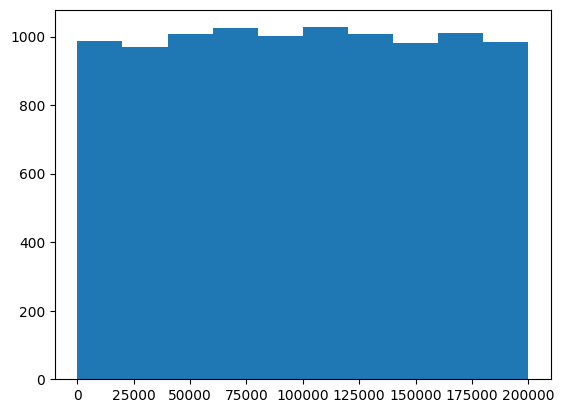

In [91]:
plt.hist(df['EstimatedSalary'])
plt.show()

In [92]:
df['Tenure'].value_counts()

Tenure
2     1046
1     1035
7     1027
8     1025
5     1012
3     1010
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [93]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5083
2    4589
3     266
4      60
Name: count, dtype: int64

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

df[columns] = scaler.fit_transform(df[columns])

In [95]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2,0,0.310811,1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0.0,0.0,0.469120,0
5,0.590,2,1,0.351351,8,0.453394,2,1.0,0.0,0.748797,1


In [96]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [97]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,0,0.324324,2,0.000000,1,1.0,1.0,0.506735
1,0.516,2,0,0.310811,1,0.334031,1,0.0,1.0,0.562709
2,0.304,0,0,0.324324,8,0.636357,3,1.0,0.0,0.569654
3,0.698,0,0,0.283784,1,0.000000,2,0.0,0.0,0.469120
5,0.590,2,1,0.351351,8,0.453394,2,1.0,0.0,0.748797


In [98]:
y.head()

0    1
1    0
2    1
3    0
5    1
Name: Exited, dtype: int64

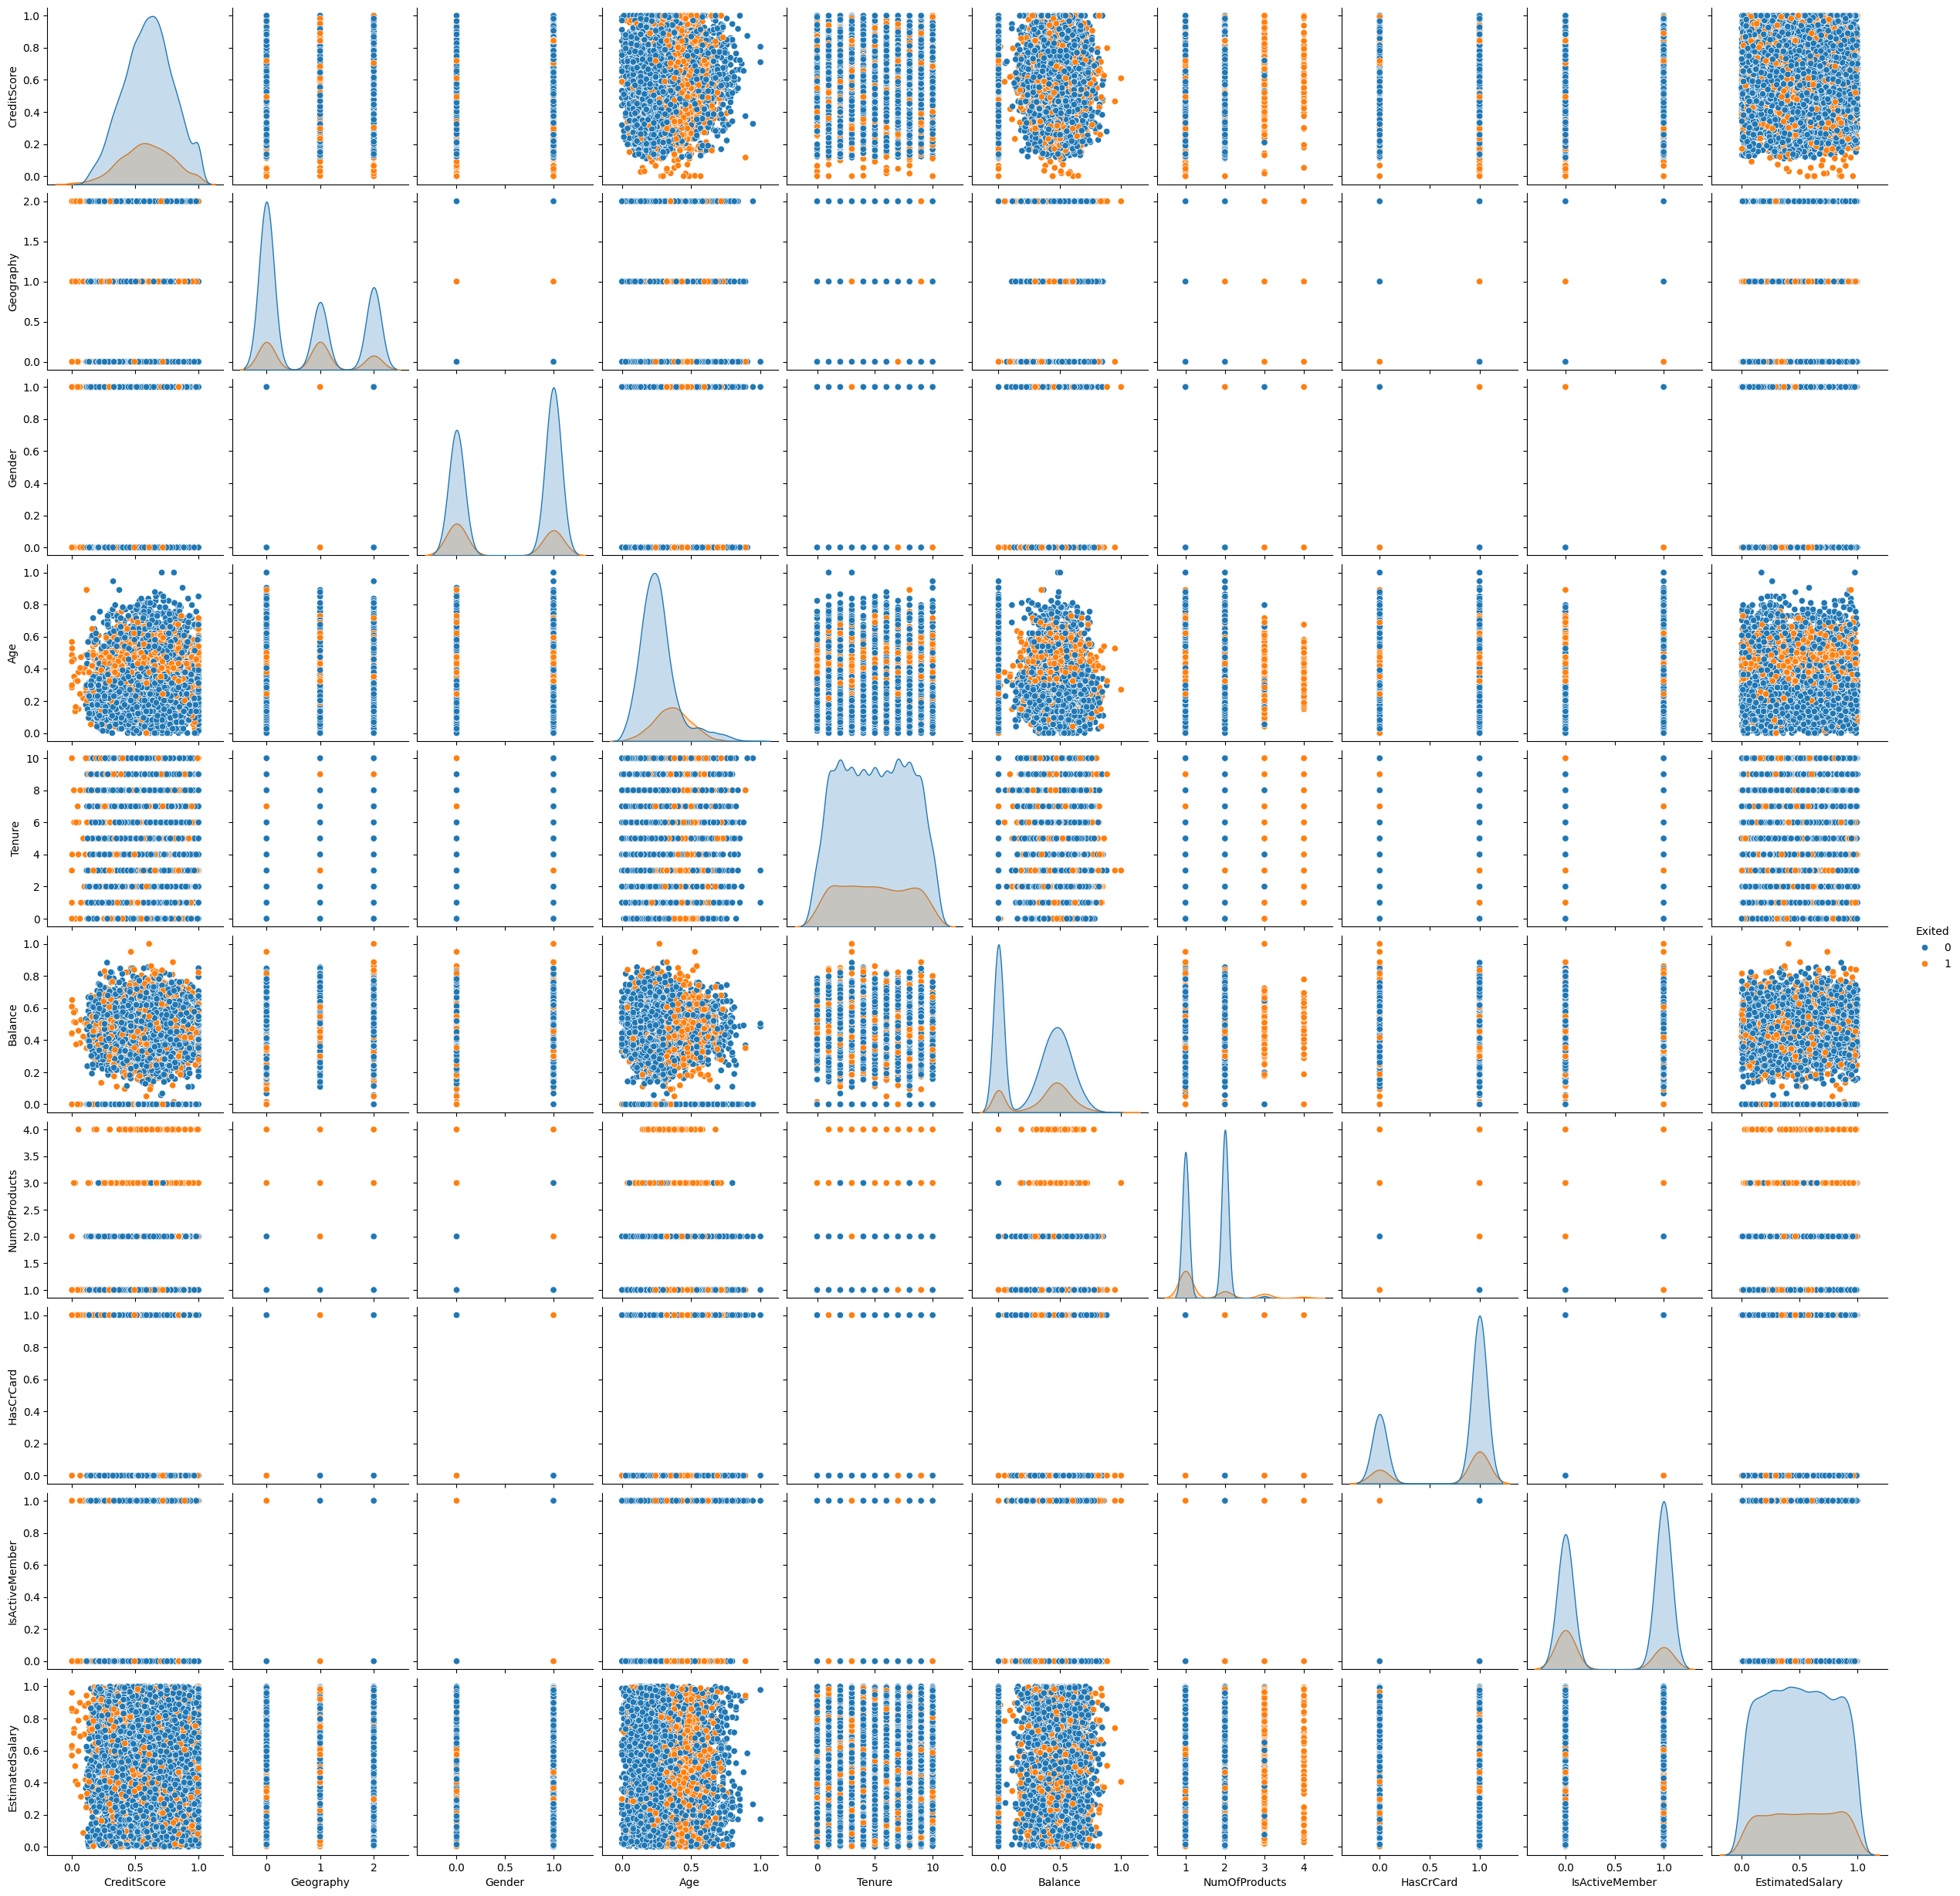

In [99]:
sns.pairplot(df, hue = 'Exited')

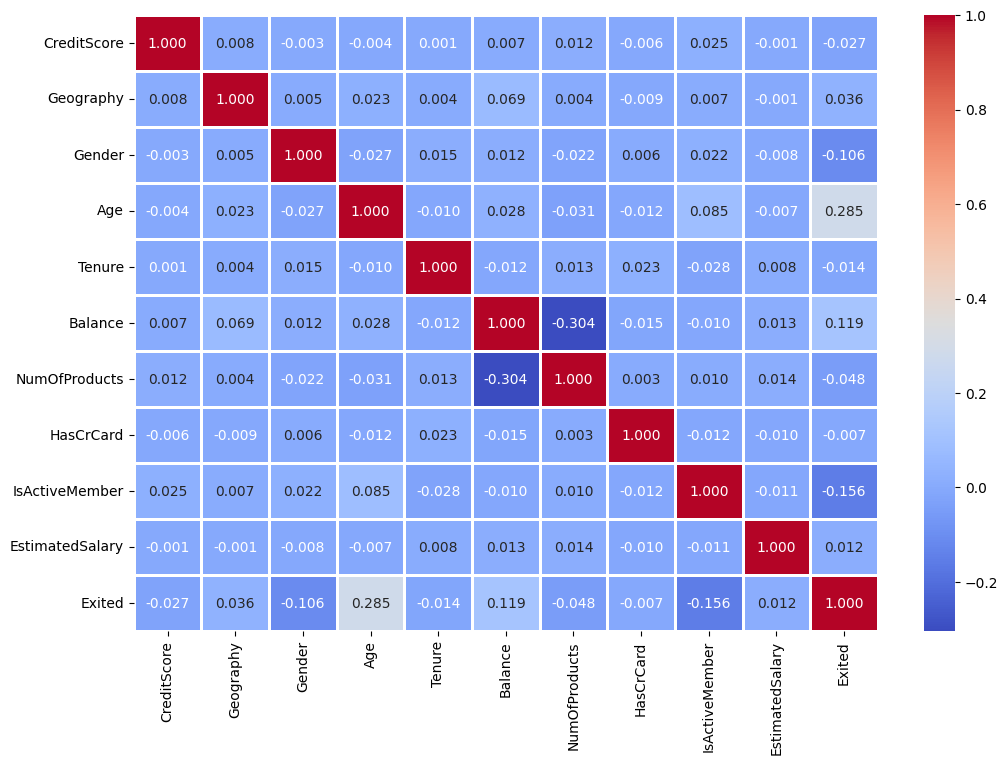

In [100]:
corr_matrix = df.corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, cmap ='coolwarm', annot= True, linewidths= True, fmt = '.3f')
plt.show()

In [187]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [189]:
lr = LogisticRegression()
svc = SVC()
knc = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth = 4)
rf = RandomForestClassifier(n_estimators=200, min_samples_split=4, max_depth=10, max_features='sqrt')

# Logistic Regression

In [190]:
lr.fit(x_train, y_train)

LogisticRegression()

In [191]:
y_pred_lr = lr.predict(x_test)

In [192]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy for logistic regression is: ", accuracy_lr)

Accuracy for logistic regression is:  0.8015


In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1572
           1       0.65      0.15      0.25       428

    accuracy                           0.80      2000
   macro avg       0.73      0.57      0.57      2000
weighted avg       0.78      0.80      0.75      2000



# Support Vector Classifier

In [194]:
svc.fit(x_train, y_train)

SVC()

In [195]:
y_pred_svc = svc.predict(x_test)

In [196]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy for support vector classifier is: ", accuracy_svc)

Accuracy for support vector classifier is:  0.797


In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1572
           1       1.00      0.05      0.10       428

    accuracy                           0.80      2000
   macro avg       0.90      0.53      0.49      2000
weighted avg       0.84      0.80      0.72      2000



# K Neighbors Classifier

In [198]:
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [199]:
y_pred_knc = knc.predict(x_test)

In [200]:
accuracy_knc = accuracy_score(y_test, y_pred_knc)
print("Accuracy for KNeighborsClassifier is: ", accuracy_knc)

Accuracy for KNeighborsClassifier is:  0.7965


In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knc))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1572
           1       0.54      0.34      0.42       428

    accuracy                           0.80      2000
   macro avg       0.69      0.63      0.65      2000
weighted avg       0.77      0.80      0.78      2000



# Decision Tree

In [202]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [203]:
y_pred_dt = dt.predict(x_test)

In [204]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for KNeighborsClassifier is: ", accuracy_dt)

Accuracy for KNeighborsClassifier is:  0.84


In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1572
           1       0.71      0.42      0.53       428

    accuracy                           0.84      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.84      0.82      2000



# Random Forest Classifier

In [206]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [207]:
y_pred_rf = rf.predict(x_test)

In [208]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest is: ", accuracy_rf)

Accuracy for Random Forest is:  0.857


In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1572
           1       0.81      0.43      0.56       428

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



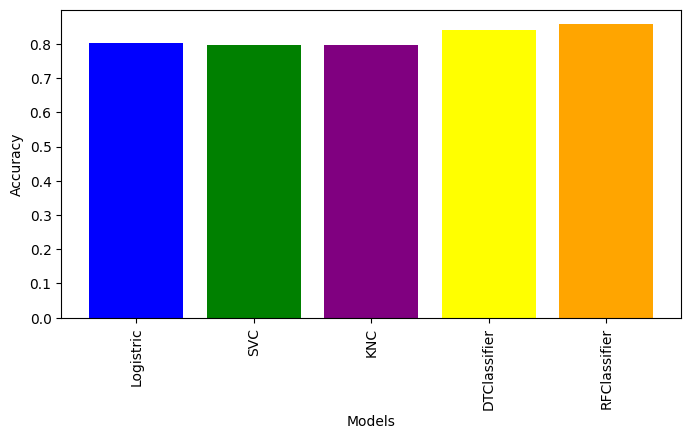

In [216]:
accuracy = [accuracy_lr, accuracy_svc, accuracy_knc, accuracy_dt, accuracy_rf]
models = ['Logistric', 'SVC', 'KNC', 'DTClassifier', 'RFClassifier']

plt.figure(figsize = (8,4))
plt.bar(models, accuracy, color = ['blue', 'green', 'purple', 'yellow', 'orange'])
plt.xticks(rotation = 90)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [217]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2,0,0.310811,1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0.0,0.0,0.469120,0
5,0.590,2,1,0.351351,8,0.453394,2,1.0,0.0,0.748797,1


In [225]:
import warnings
warnings.filterwarnings('ignore')
rf.predict([[0.516 , 2 , 0 , 0.310811 , 1 , 0.334031 ,1 ,0.0, 1.0 ,0.562709]])
# Answer is zero

array([0])

# Thank you